## Model regresji logistycznej

Data loading

In [1]:

import pandas as pd
import numpy as np
import pyodbc 
from patsy import dmatrices
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=LAPTOP-FLVDOFJN\SQLEXPRESS;"
                      "Database=DPR;"
                      "Trusted_Connection=yes;")

sql = """
SELECT 
                                [umo].[umowa]
                                ,[umo].[podumo]
                                ,[umo].[oferta]
                                ,[umo].[FFINRPFH_czy]
                                ,[umo].[KLi_NIP]
                                ,[umo].[KLi_NAZWASKR]
                                ,[umo].[KLi_NAZWA]
                                ,[umo].[PORECZYCIEL_CZY]
                                ,[umo].[PORECZYCIEL_NIP]
                                ,[umo].[TR_DTZAWC]
                                ,[umo].[TR_DTZAWC_MC]
                                ,[umo].[TR_DTZAWC_Q]
                                ,[umo].[TR_DTZAWC_RokOkres]
                                ,[umo].[TR_DTZAWC_H]
                                ,[umo].[TR_DTZAWC_Y]
                                ,[umo].[TR_D30M3]
                                ,[umo].[TR_D60M3]
                                ,[umo].[TR_D60M6]
                                ,[umo].[TR_D60M12]
                                ,[umo].[TR_D60M24]
                                ,[umo].[TR_D60M36]
                                ,[umo].[TR_D90M12]
                                ,[umo].[TR_D90M24]
                                ,[umo].[TR_D90M36]
                                ,[umo].[TR_STATUS_UMOWY_BIEZ]
                                ,[umo].[TR_POZIOM_wykonanie]
                                ,[umo].[TR_POZIOM_estymator]
                                ,[umo].[TR_ANEKS_dataZawarciaUmowyAneksowanej]
                                ,[umo].[TR_ANEKS_dataZawarciaAneksu]
                                ,[umo].[TR_ANEKS_dataPierwszejZmianyKlienta]
                                ,[umo].[TR_ANEKS_RODZAJ_id]
                                ,[umo].[TR_HANDLOWIEC_SIEC]
                                ,[umo].[TR_DOSTAWCA_NIP]
                                ,[umo].[TR_DOSTAWCA_KATEGORIA]
                                ,[umo].[TR_DOSTAWCA_KLASYFIKACJA]
                                ,[umo].[TR_DOSTAWCA_LSD]
                                ,[umo].[TR_DOSTAWCA_LSD_MiU]
                                ,[umo].[TR_DOSTAWCA_LSD_TRUCK]
                                ,[umo].[TR_DOSTAWCA_LSD_OSD]
                                ,[umo].[TR_TYP_LEASINGU]
                                ,[umo].[TR_TYP_UMOWY]
                                ,[umo].[TR_WARIANT]
                                ,[umo].[TR_PROCEDURA]
                                ,[umo].[TR_HARMONOGRAM]
                                ,[umo].[TR_HARMONOGRAM_czy_odrocz]
                                ,[umo].[TR_LEAS_ZWROTNY_CZY]
                                ,[umo].[TR_OKRES]
                                ,[umo].[TR_WO]
                                ,[umo].[TR_IRR]
                                ,[umo].[TR_WARTOSC_WYKUPU]
                                ,[umo].[TR_WARTOSC_WYKUPU_UDZIAL_CI]
                                ,[umo].[TR_WARTOSC_WYKUPU_UDZIAL_RAT]
                                ,[umo].[TR_WARTOSC_WYKUPU_UDZIAL_KON]
                                ,[umo].[TR_CI]
                                ,[umo].[TR_CI_PROC]
                                ,[umo].[TR_PD_2013]
                                ,[umo].[TR_EL_2013]
                                ,[umo].[KL_KAT_ZAW_2013]
                                ,[umo].[KL_SCORING_2013]
                                ,[umo].[PRZEDM_asset]
                                ,[umo].[PRZEDM_asset_DPR]
                                ,[umo].[PRZEDM_OPIS_PRZEDMIOTU]
                                ,[umo].[PRZEDM_OPIS_PRZEDMIOTU_GRUPA]
                                ,[umo].[PRZEDM_OPIS_PRZEDMIOTU_GRUPA2]
                                ,[umo].[PRZEDM_ROKPROD]
                                ,[umo].[PRZEDM_WIEK_URUCH]
                                ,[umo].[PRZEDM_WIEK_KONIEC_UM]
                                ,[umo].[PRZEDM_KLASA]
                                ,[umo].[PRZEDM_LUX]
                                ,[umo].[PRZEDM_PREMIUM]
                                ,[umo].[PRZEDM_MARKA]
                                ,[umo].[PRZEDM_MARKA_ID]
                                ,[umo].[PRZEDM_MODEL]
                                ,[umo].[PRZEDM_SEGMENT]
                                ,[umo].[PRZEDM_STAWKA_AMORTYZACJI]
                                ,[umo].[KL_KAT_ZAW_GRUPA]
                                ,[umo].[KL_ZRODLO_DANYCH]
                                ,[umo].[KL_PKD2007_MAP]
                                ,[umo].[KLi_PKD2007_MAP]
                                ,[umo].[KL_DZIALALNOSC_OPIS]
                                ,[umo].[KL_DZIALALNOSC]
                                ,[umo].[KL_nTSL]
                                ,[umo].[KL_nBUD]
                                ,[umo].[KL_nBUD_nTSL]
                                ,[umo].[KL_nWZP]
                                ,[umo].[KL_BRANZA_OPIS]
                                ,[umo].[KL_BRANZA_OPIS_GRUPA]
                                ,[umo].[KL_BRANZA_PREF_ZAW]
                                ,[umo].[KL_BRANZA_PREF_BIEZ]
                                ,[umo].[KL_TYP_DZIALALNOSCI]
                                ,[umo].[KL_KLASA_PRZEWOZNIKA]
                                ,[umo].[KL_DATAROZPDZIAL]
                                ,[umo].[KL_CZASPROWDZIALGOSP_L]
                                ,[umo].[KL_FORMA_DZIAL]
                                ,[umo].[KL_STAN_CYWILNY]
                                ,[umo].[KL_LICZBA_PRAC]
                                ,[umo].[KL_WIEK_PESELDEC]
                                ,[umo].[KL_DOCHOD_RB]
                                ,[umo].[KL_DOCHOD_RU]
                                ,[umo].[KL_DOCHOD_MC]
                                ,[umo].[KL_DOCHOD_12M]
                                ,[umo].[KL_OBROT_RB]
                                ,[umo].[KL_OBROT_RU]
                                ,[umo].[KL_OBROT_12M]
                                ,[umo].[KL_OBROT_MAX]
                                ,[umo].[KL_OBROT_MC]
                                ,[umo].[KL_ZYSK_RU]
                                ,[umo].[KL_LICZBA_MIES_RU]
                                ,[umo].[KL_LICZBA_MIES_RB]
                                ,[umo].[KL_FIN_RODZAJ_KSIEGOWOSCI_RU_id]
                                ,[umo].[KL_FIN_RODZAJ_KSIEGOWOSCI_RB_id]
                                ,[umo].[KL_FIN_TYP_DOK_RU_id]
                                ,[umo].[KL_FIN_TYP_DOK_RB_id]
                                ,[umo].[KL_FIN_RYCZALT_czy]
                                ,[umo].[KL_RENT_RU]
                                ,[umo].[KL_RENT_RB]
                                ,[umo].[KL_RENT_MC]
                                ,[umo].[KL_DYNAM_DOCHOD]
                                ,[umo].[KL_DYNAM_OBROT]
                                ,[wyk].[TR_Default_FirstDate30]
                                ,[wyk].[TR_Default_FirstDate60]
                                ,[wyk].[TR_Default_FirstDate90]
                                ,[wyk].[TR_FRAUD_DataStatusu]
                              FROM 
                                [DPR].[dbo].[mk_dane_umow] [umo]
                                inner join
                                [DPR].[dbo].[mk_SCORE_umowy_wykonanie] [wyk] on [umo].[umowa] = [wyk].[umowa]
                              WHERE 
                                [TR_DTZAWC_RokOkres] >= 201101
                                and [umo].[FFINRPFH_czy] = 1
"""
#df = pandas.io.sql.read_sql(sql, conn)
df = pd.read_sql(sql, conn)
conn.close()

Data basic exploration

In [3]:
print(df.shape)

(115350, 123)


In [4]:
print(*df.columns, sep = '\n')

umowa
podumo
oferta
FFINRPFH_czy
KLi_NIP
KLi_NAZWASKR
KLi_NAZWA
PORECZYCIEL_CZY
PORECZYCIEL_NIP
TR_DTZAWC
TR_DTZAWC_MC
TR_DTZAWC_Q
TR_DTZAWC_RokOkres
TR_DTZAWC_H
TR_DTZAWC_Y
TR_D30M3
TR_D60M3
TR_D60M6
TR_D60M12
TR_D60M24
TR_D60M36
TR_D90M12
TR_D90M24
TR_D90M36
TR_STATUS_UMOWY_BIEZ
TR_POZIOM_wykonanie
TR_POZIOM_estymator
TR_ANEKS_dataZawarciaUmowyAneksowanej
TR_ANEKS_dataZawarciaAneksu
TR_ANEKS_dataPierwszejZmianyKlienta
TR_ANEKS_RODZAJ_id
TR_HANDLOWIEC_SIEC
TR_DOSTAWCA_NIP
TR_DOSTAWCA_KATEGORIA
TR_DOSTAWCA_KLASYFIKACJA
TR_DOSTAWCA_LSD
TR_DOSTAWCA_LSD_MiU
TR_DOSTAWCA_LSD_TRUCK
TR_DOSTAWCA_LSD_OSD
TR_TYP_LEASINGU
TR_TYP_UMOWY
TR_WARIANT
TR_PROCEDURA
TR_HARMONOGRAM
TR_HARMONOGRAM_czy_odrocz
TR_LEAS_ZWROTNY_CZY
TR_OKRES
TR_WO
TR_IRR
TR_WARTOSC_WYKUPU
TR_WARTOSC_WYKUPU_UDZIAL_CI
TR_WARTOSC_WYKUPU_UDZIAL_RAT
TR_WARTOSC_WYKUPU_UDZIAL_KON
TR_CI
TR_CI_PROC
TR_PD_2013
TR_EL_2013
KL_KAT_ZAW_2013
KL_SCORING_2013
PRZEDM_asset
PRZEDM_asset_DPR
PRZEDM_OPIS_PRZEDMIOTU
PRZEDM_OPIS_PRZEDMIOTU_GRUPA
PRZE

In [52]:
ind_numeric = [i for i in range(df.shape[1]) if pd.api.types.is_numeric_dtype(df.iloc[:,i])]
from vba import vba
v = vba(df)

ImportError: cannot import name 'vba'

In [48]:
def vba(df):
    min_val  = list(np.repeat(np.nan, df.shape[1])) 
    med_val  = list(np.repeat(np.nan, df.shape[1])) 
    max_val  = list(np.repeat(np.nan, df.shape[1]))
    mean_val = list(np.repeat(np.nan, df.shape[1])) 
    std_val  = list(np.repeat(np.nan, df.shape[1]))
    for i in range(df.shape[1]):
        if pd.api.types.is_numeric_dtype(df.iloc[:,i]):
            d = df.iloc[:,i].describe()
            min_val[i] = d[3]
            med_val[i]  = d[5]
            max_val[i]  = d[7]
            mean_val[i] = d[1]
            std_val[i]  = d[2]

    flag_numeric = [pd.api.types.is_numeric_dtype(df.iloc[:,i])*1 for i in range(df.shape[1])]
    mcv    = [list(df.iloc[:,i].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=False))[0] for i in range(df.shape[1])]
    lcv    = [list(df.iloc[:,i].value_counts(normalize=True, sort=True, ascending=True, bins=None, dropna=False))[0] for i in range(df.shape[1])]
    df_vba = pd.DataFrame({'Variable':df.columns, 
                           'flag_numeric': flag_numeric,
                           'NaN_count':df.isnull().sum(), 
                           'Unique_count':df.nunique(dropna=False), 
                           'NaN_frac':df.isnull().sum()/len(df), 
                           'mcv_frac':mcv, 
                           'lcv_frac':lcv,
                           'min_val':min_val,
                           'med_val':med_val,
                           'max_val':max_val,
                           'mean_val':mean_val,
                           'std_val':std_val},
                           columns = ['Variable', 'flag_numeric','NaN_count', 'Unique_count', 'NaN_frac', 'mcv_frac', 
                                      'lcv_frac', 'min_val', 'med_val', 'max_val', 'mean_val', 'std_val'])


    print(*df_vba, sep='\n')
    df_vba.to_csv('vba.csv', sep=';', index = False, decimal = ',')
    return df_vba

In [49]:
a=vba(df)

Variable
flag_numeric
NaN_count
Unique_count
NaN_frac
mcv_frac
lcv_frac
min_val
med_val
max_val
mean_val
std_val


Filtrowanie danych + wybór predyktorów i targetu

In [8]:
path_var = 'E:\\Wojtek\\_DSCN_\\Analiza_danych\\Leas\\data_set\\'
var_df = pd.read_csv(path_var+'variables.csv', sep=';')
var_df.columns
var_df.type_var.value_counts()
var_df.head(10)
var_df.type_pred.value_counts(dropna=False)
print(type(var_df))


#predictors = var_df.variable[ (var_df.type_var == 'pred') | (var_df.variable == target_name) ]
predictors = var_df.variable[ var_df.type_var == 'pred' ]
type(predictors)
#type(list)(predictors)
target_name = 'TR_D90M12'

col = df.columns.isin(predictors)+df.columns.isin([target_name])  # to raczej nie jest eleganckie rozwiązanie

df_filtered = df.loc[ (df.FFINRPFH_czy == 1) 
            & (df.TR_ANEKS_RODZAJ_id  == 0) 
            & (df.TR_POZIOM_wykonanie == 1)  
            & (df.PORECZYCIEL_CZY == 0)
            & (pd.isnull(df.TR_FRAUD_DataStatusu)) 
            & (~ pd.isnull(df.loc[:,target_name])), col]
df_filtered.shape

df_filtered2 = df_filtered.dropna(axis = 0, how = 'any')
print(df_filtered2.shape)


var_in_model      = ['KL_CZASPROWDZIALGOSP_L','TR_CI_PROC', 'PRZEDM_WIEK_KONIEC_UM','KL_DYNAM_OBROT','TR_OKRES','KL_WIEK_PESELDEC','KL_RENT_RB']
df_filtered2_dumm = pd.get_dummies(df_filtered2.loc[:,['KL_BRANZA_OPIS', 'KL_FORMA_DZIAL']], prefix='Categ', columns=['KL_BRANZA_OPIS', 'KL_FORMA_DZIAL'], drop_first = True, dummy_na = False) # drop_first - wyrzucamy pierwszy poziom; w macierzy jest n-1 wartoci
df_filtered2_dumm = pd.get_dummies(df_filtered2.loc[:,['PRZEDM_asset_DPR']], prefix='Categ', columns=['PRZEDM_asset_DPR'], drop_first = True, dummy_na = False) # drop_first - wyrzucamy pierwszy poziom; w macierzy jest n-1 wartoci
print(df_filtered2_dumm.shape)
df_filtered3 = pd.concat([df_filtered2.loc[:,df_filtered2.columns.isin(var_in_model)], df_filtered2_dumm], axis=1)
y = df_filtered2.loc[:, target_name]

print(df_filtered3.shape)

<class 'pandas.core.frame.DataFrame'>
(59611, 75)
(59611, 5)
(59611, 12)


Macierz korelacji

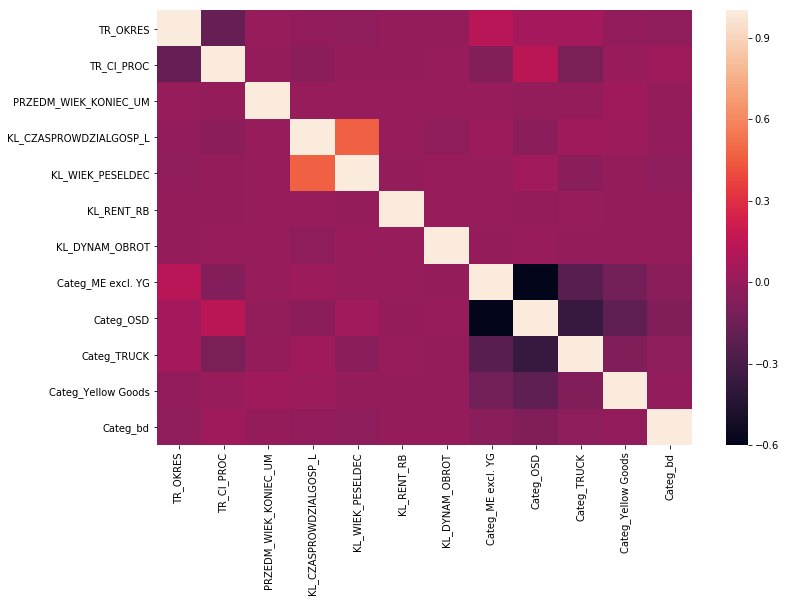

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df_filtered3.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()
print(corr)

Analiza predyktorów ciągłych

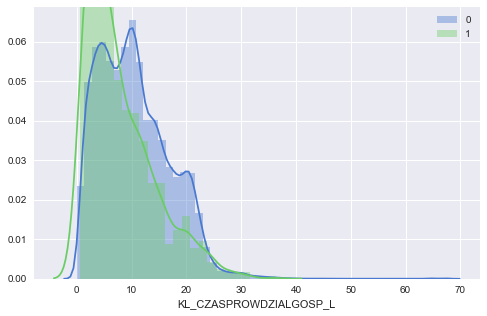

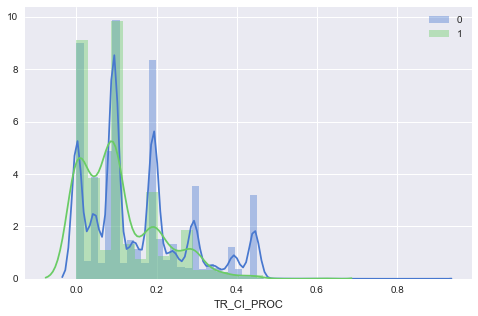

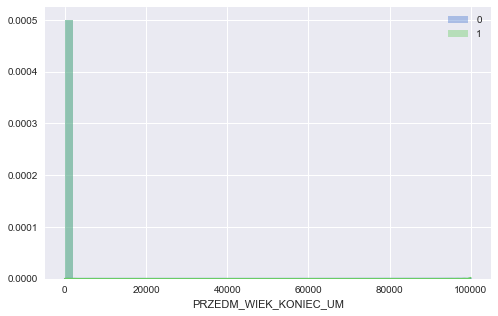

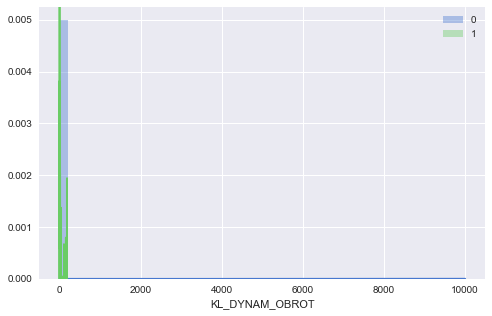

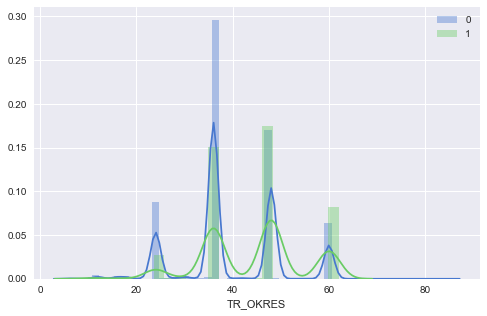

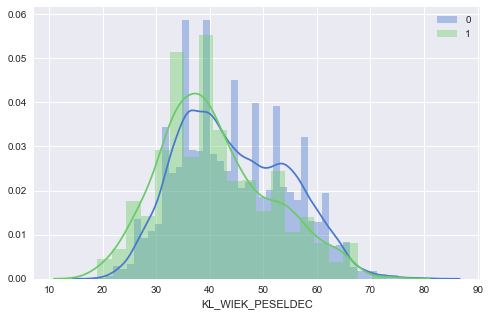

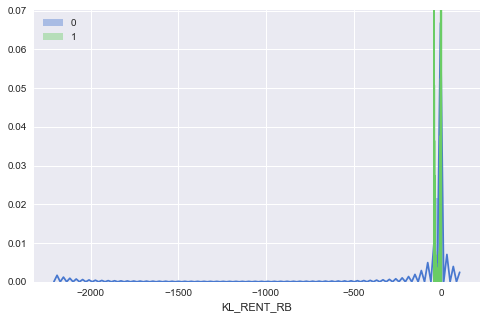

In [17]:
import seaborn as sns
for var in var_in_model:
    sns.set(color_codes=True)
    sns.set_palette(sns.color_palette("muted"))
    plt.figure(figsize = (8,5))
    sns.distplot(df_filtered3.loc[y == 0, var])
    sns.distplot(df_filtered3.loc[y == 1, var])
    plt.legend(['0', '1'])
    plt.rc("font", size=200)
    plt.show()

Analiza predyktorów dyskretnych

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
for var in ['KL_BRANZA_OPIS', 'KL_FORMA_DZIAL']:
    plt.subplots(figsize=(12,8))
    sns.barplot(x=var, hue=target_name, data=df_filtered2)
    plt.show()  

    plt.figure(figsize = (8,5))    
    pd.crosstab(df_filtered2.loc[:, var],y).plot(kind='bar')
    plt.title('')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    #plt.savefig('purchase_fre_job')
    plt.show()


TypeError: unsupported operand type(s) for /: 'str' and 'int'

Podział próby

In [11]:

from sklearn.model_selection import train_test_split
df_filtered3_train, df_filtered3_test, y_train, y_test = train_test_split(df_filtered3, y, test_size = 0.4, random_state=111)

#-- inny sposób na podział próby
#train = df_filtered3.sample(frac=0.6, random_state=1) #  inny sposób na podział próby na TRN i TST
#test = df_filtered3.loc[~df_filtered3.index.isin(train.index)]
#print(df_filtered3.shape)
#print(train.shape)
#print(test.shape)

Selekcja zmiennych

In [12]:
#--- Selekcja zmiennych
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 10, verbose = 1)
rfe = rfe.fit(df_filtered3_train, y_train )
print(df_filtered3_train.columns[rfe.support_])
print(rfe.ranking_)
print(rfe.estimator_)

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Index(['TR_OKRES', 'TR_CI_PROC', 'KL_CZASPROWDZIALGOSP_L', 'KL_WIEK_PESELDEC',
       'KL_RENT_RB', 'Categ_ME excl. YG', 'Categ_OSD', 'Categ_TRUCK',
       'Categ_Yellow Goods', 'Categ_bd'],
      dtype='object')
[1 1 3 1 1 1 2 1 1 1 1 1]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Postać modelu - w sklern nie ma tego, więc trzeba przejść na statsmodels

In [13]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,df_filtered3_train[df_filtered3_train.columns[rfe.support_]])
result=logit_model.fit()
print(result.summary())

C:\Users\Wojtek\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.087854
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              TR_D90M12   No. Observations:                35766
Model:                          Logit   Df Residuals:                    35756
Method:                           MLE   Df Model:                            9
Date:                Thu, 19 Jul 2018   Pseudo R-squ.:                 0.03291
Time:                        21:20:07   Log-Likelihood:                -3142.2
converged:                       True   LL-Null:                       -3249.1
                                        LLR p-value:                 4.047e-41
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
TR_OKRES                   0.0069      0.004      1.929      0.054      -0.000     

In [14]:

#Fit Logit model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import roc_curve
#from sklearn.metrics import auc

logReg = LogisticRegression()
#logReg = logReg.fit(df_filtered3_train, y_train)
logReg = logReg.fit(df_filtered3_train[df_filtered3_train.columns[rfe.support_]], y_train)
#y_pred = logReg.predict_proba(df_filtered3_test)
y_pred = logReg.predict_proba(df_filtered3_test[df_filtered3_train.columns[rfe.support_]])

Ocena modelu


0.726194677352


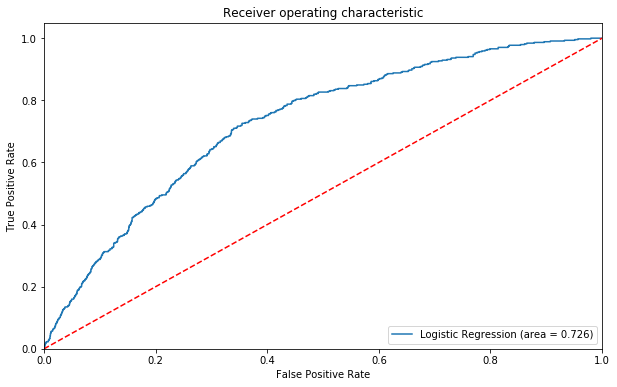

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred[:,1])
auc_metric = auc(false_positive_rate, true_positive_rate)
print(auc_metric)

#--- ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#auc_metric = roc_auc_score(y_test, y_pred[:,1])
#fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate, true_positive_rate, label='Logistic Regression (area = %0.3f)' % auc_metric)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred[:,1])
print(confusion_matrix) 

ValueError: Classification metrics can't handle a mix of binary and continuous targets

CrossValidation

In [19]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
X = df_filtered3[df_filtered3_train.columns[rfe.support_]]

results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

SyntaxError: invalid syntax (<ipython-input-19-9856599df8f7>, line 9)

In [22]:
print(results)

[ 0.97936934  0.97986915  0.97349438  0.98238551  0.98439859  0.98104345
  0.98456635  0.98339205  0.98842476  0.98054018]


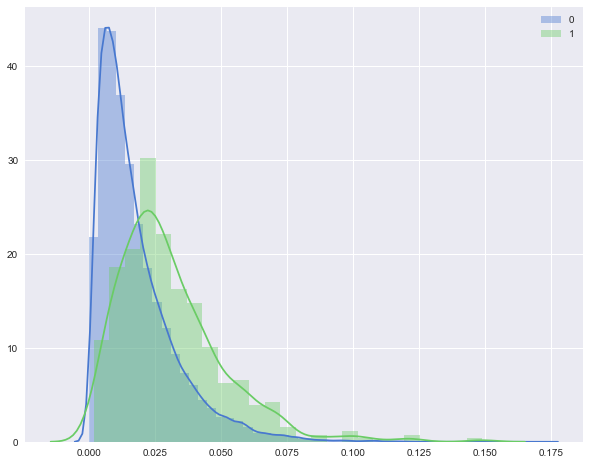

In [24]:
import seaborn as sns
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
plt.figure(figsize = (10,8))
sns.distplot(y_pred[y_test == 0,1])
sns.distplot(y_pred[y_test == 1,1])
plt.legend(['0', '1'])
plt.rc("font", size=200)
plt.show()

Zapis modelu

In [25]:
#---- Zapis modelu
from sklearn.externals import joblib
#filename = 'E:\\Wojtek\\_DSCN_\\Analiza_danych\\Leas\\data_set\\logRegTest.sav'
filename = 'logRegTest.sav'
joblib.dump(logReg, filename)

#import pickle
##filename2 = 'E:\\Wojtek\\_DSCN_\\Analiza_danych\\Leas\\data_set\\logRegTest2.sav'
#filename2 = 'logRegTest2.sav'
#pickle.dump(logReg, open(filename2, 'wb'))

['logRegTest.sav']

Załadowanie modelu z pliku

In [ ]:
#---- Ładowanie modelu
#filename = 'E:\\Wojtek\\_DSCN_\\Analiza_danych\\Leas\\data_set\\logRegTest.sav'
filename = 'logRegTest.sav'
loaded_model = joblib.load(filename)
result = loaded_model.score(df_filtered3, y_test)
print(result)

In [30]:
filename = 'logRegTest.sav'
loaded_model = joblib.load(filename)
y_pred = loaded_model.predict_proba(df_filtered3_test[df_filtered3_train.columns[rfe.support_]])

In [35]:
y_pred[:,1].mean()

0.018256989669064069

In [4]:
[i**2 for i in [1,2,3,4]]

[1, 4, 9, 16]

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#for var in ['KL_BRANZA_OPIS', 'KL_FORMA_DZIAL']:
plt.subplots(figsize=(12,8))
sns.barplot(x='KL_BRANZA_OPIS', data=df_filtered2)
plt.show()  

       

TypeError: unsupported operand type(s) for /: 'str' and 'int'

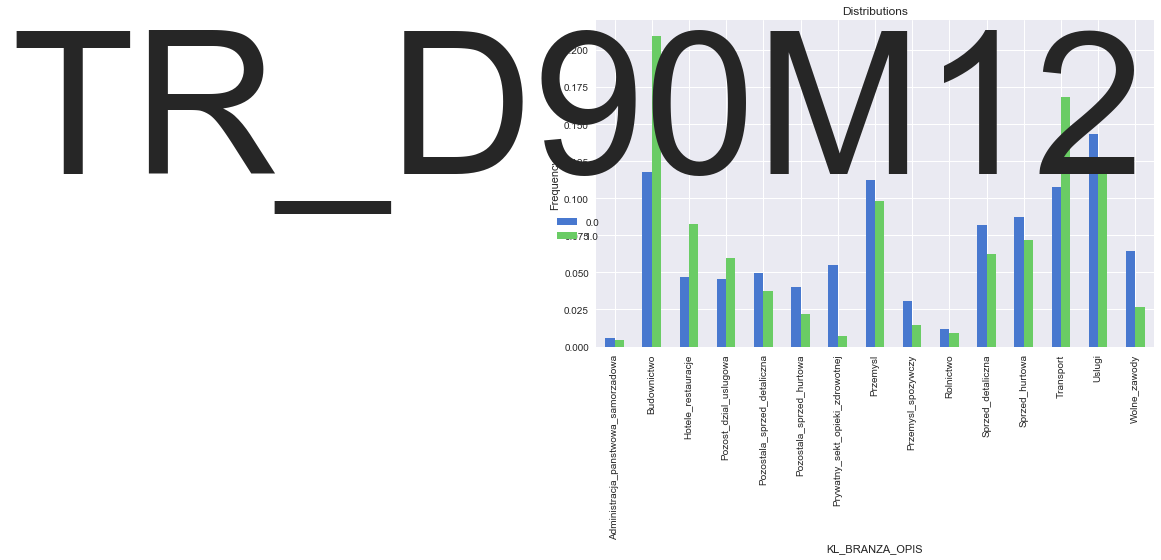

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#['KL_BRANZA_OPIS', 'KL_FORMA_DZIAL']
#plt.figure(figsize=(10, 6))    
pd.crosstab(df_filtered2.loc[:, 'KL_BRANZA_OPIS'],df_filtered2.loc[:, target_name], normalize='columns').plot(kind='bar', figsize=(10,6))
plt.title('Distributions')
plt.xlabel(var)
plt.ylabel('Frequency')
#plt.savefig('purchase_fre_job')
plt.show()


# first some sample data
 import numpy as np 
 import pandas as pd
 import seaborn as sns
 df = pd.DataFrame({'mark':mark,'period':periods})
 ct = pd.crosstab(df_filtered2.loc[:, 'KL_BRANZA_OPIS'], df_filtered2.loc[:, target_name], normalize='columns')
 # now stack and reset
 stacked = ct.stack().reset_index().rename(columns={0:'value'})

 # plot grouped bar chart
sns.barplot(x=stacked.period, y=stacked.value, hue=stacked.mark)
https://stackoverflow.com/questions/43544694/using-pandas-crosstab-with-seaborn-stacked-barplots

In [48]:
pd.crosstab(df_filtered2.loc[:, 'KL_BRANZA_OPIS'],y, normalize = 'columns', rownames=None, colnames=None)

TR_D90M12,0.0,1.0
KL_BRANZA_OPIS,,
Administracja_panstwowa_samorzadowa,0.005793,0.004596
Budownictwo,0.117749,0.209559
Hotele_restauracje,0.046648,0.082721
Pozost_dzial_uslugowa,0.045298,0.059743
Pozostala_sprzed_detaliczna,0.049485,0.037684
Pozostala_sprzed_hurtowa,0.040377,0.022059
Prywatny_sekt_opieki_zdrowotnej,0.055072,0.007353
Przemysl,0.112674,0.098346
Przemysl_spozywczy,0.030672,0.014706


In [54]:

ct = pd.crosstab(df_filtered2.loc[:, 'KL_BRANZA_OPIS'],df_filtered2.loc[:, target_name], normalize='columns')

 # now stack and reset
 a = ct.stack().reset_index()#.rename(columns={0:'value'})
type(stacked)
 # plot grouped bar chart
# sns.barplot(x=stacked.period, y=stacked.value, hue=stacked.mark)

IndentationError: unexpected indent (<ipython-input-54-4f2d53183315>, line 5)

In [55]:
help(ct.stack)

Help on method stack in module pandas.core.frame:

stack(level=-1, dropna=True) method of pandas.core.frame.DataFrame instance
    Pivot a level of the (possibly hierarchical) column labels, returning a
    DataFrame (or Series in the case of an object with a single level of
    column labels) having a hierarchical index with a new inner-most level
    of row labels.
    The level involved will automatically get sorted.
    
    Parameters
    ----------
    level : int, string, or list of these, default last level
        Level(s) to stack, can pass level name
    dropna : boolean, default True
        Whether to drop rows in the resulting Frame/Series with no valid
        values
    
    Examples
    ----------
    >>> s
         a   b
    one  1.  2.
    two  3.  4.
    
    >>> s.stack()
    one a    1
        b    2
    two a    3
        b    4
    
    Returns
    -------
    stacked : DataFrame or Series

